In [1]:
import selenium
import pandas as pd
import numpy as np
import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import chrome
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

In [2]:
df= pd.read_csv('data.csv')

In [3]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [4]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [5]:
df.fillna(0, inplace=True)
x = df[['rooms', 'area_size']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create DataFrame with feature names
feature_names = ['rooms', 'area_size']
x_train = pd.DataFrame(x_train, columns=feature_names)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 80919.8468472139


In [6]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))


In [7]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)

  def _gradient_descent_step(self, X, targets, lr):
    predictions = self.predict(X)
    error = predictions - targets
    gradient = np.dot(X.T, error) / len(X)
    self._W -= lr * gradient

  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(x, y, lr)       
        
    return self

In [8]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

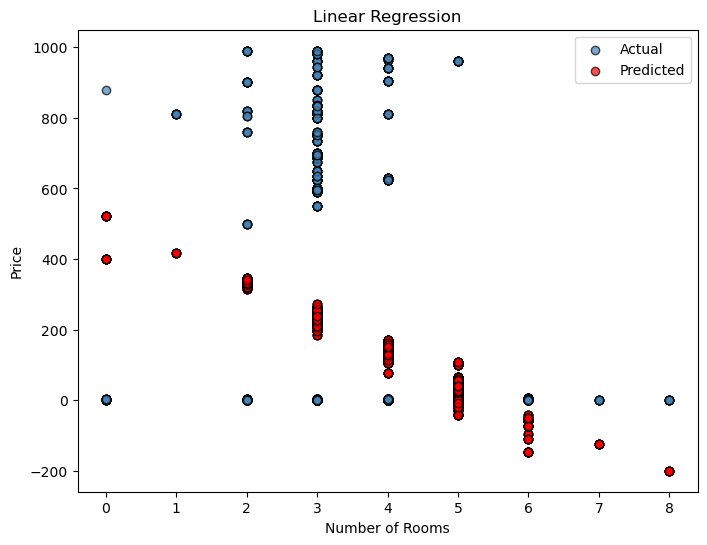

c:\Users\Sharon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


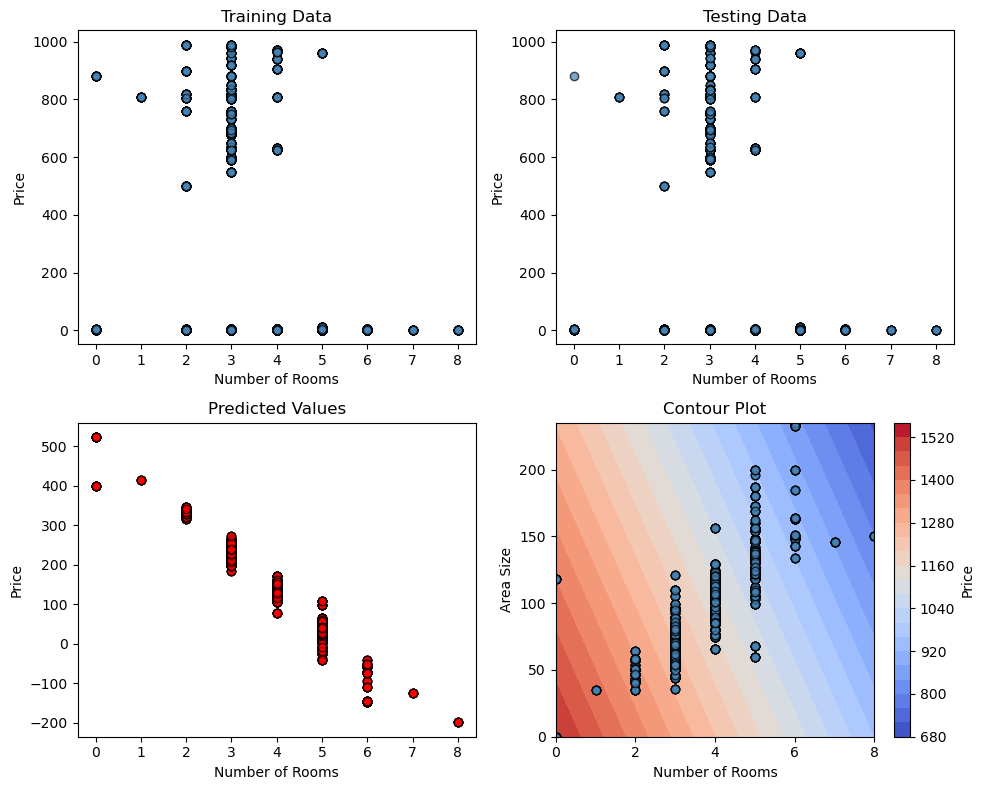

In [9]:
import matplotlib.colorbar as cbar

# Set the feature names of x_test
x_test.columns = ['rooms', 'area_size']

# Set a common color for the scatter plots
scatter_color = 'steelblue'

# Plotting the scatter plot with the regression line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_test['rooms'], y_test, color=scatter_color, label='Actual', alpha=0.7, edgecolors='k')
ax.scatter(x_test['rooms'], y_pred, color='red', label='Predicted', alpha=0.7, edgecolors='k')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Price')
ax.set_title('Linear Regression')
ax.legend()
plt.show()

# Plotting the contour plot
x_range = np.linspace(np.min(x['rooms']), np.max(x['rooms']), 100)
y_range = np.linspace(np.min(x['area_size']), np.max(x['area_size']), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = model.predict(np.array([x_mesh.ravel(), y_mesh.ravel()]).T).reshape(x_mesh.shape) + 1000

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of training data
axs[0, 0].scatter(x_train['rooms'], y_train, color=scatter_color, alpha=0.7, edgecolors='k')
axs[0, 0].set_xlabel('Number of Rooms')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('Training Data')

# Scatter plot of testing data
axs[0, 1].scatter(x_test['rooms'], y_test, color=scatter_color, alpha=0.7, edgecolors='k')
axs[0, 1].set_xlabel('Number of Rooms')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Testing Data')

# Predicted values scatter plot
axs[1, 0].scatter(x_test['rooms'], y_pred, color='red', alpha=0.7, edgecolors='k')
axs[1, 0].set_xlabel('Number of Rooms')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Predicted Values')

# Contour plot
contour = axs[1, 1].contourf(x_mesh, y_mesh, z_mesh, levels=20, cmap='coolwarm')
axs[1, 1].scatter(x_test['rooms'], x_test['area_size'], color=scatter_color, alpha=0.7, edgecolors='k')
axs[1, 1].set_xlabel('Number of Rooms')
axs[1, 1].set_ylabel('Area Size')
axs[1, 1].set_title('Contour Plot')

# Add colorbar
cbar = fig.colorbar(contour, ax=axs[1, 1])
cbar.set_label('Price')

plt.tight_layout()
plt.show()